<a href="https://colab.research.google.com/github/danvargasgo/Repositorio_Algoritmos/blob/main/Lab6/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron simple




In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import random
from google.colab import files
pd.set_option('display.max_columns', 500)

# Definición de la clase perceptron 



In [ ]:
class Perceptron:
    def __init__(self, eta=0.1, n_iter=10):
        self.eta = float(eta)
        self.n_iter = n_iter

    def train(self, X, y):
        # inicializar los pesos en 0
        self.w = np.zeros(len(X[1])+1)
        #vector de errores acumulados
        self.errors = []

        #ciclo de entrenamiento
        for i in range(self.n_iter):
            errors = 0
            for x_i, target in zip(X,y):
                #calcular el nuevo valor de los pesos
                delta_w = np.array((target - self.predict(x_i)) * self.eta)
                #actualizar el valor de los pesos
                self.w[1:] += delta_w * x_i
                #actualizar el valor del bias
                self.w[0] += delta_w
                if (delta_w!=0):
                    errors += 1
            self.errors.append(errors)
 

    def predict(self, X):
        #combinacion lineal, w[0] = bias
        v = np.dot( X, self.w [1:]) + self.w[0]
        #funcion de activación 
        if v > 0.0:
            return 1
        return -1

In [ ]:
#cargar los archivos de los dataset de cáncer de mama
files.upload();

Saving wdbc.data to wdbc.data


# Leer el dataset Cáncer de mama


El dataset esta disponible en https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)


In [ ]:
#Leer los datos del archivo
df = pd.read_csv('wdbc.data', sep=",", header=None)
df = df.sort_values(df.columns[1])
df = df.reset_index(drop=True)
for i in df.index:
  if df[1][i] == 'M':
    print(i)
    break
#tomar 100 filas, las columnas textura y perímetro
BC_df = df[307:408][[3,4]]
#tomar la columna Diagnosis como 1 para maligno y -1 para benigno
y_BC = df[307:408][[1]]
BC_df = np.array(BC_df, float)
y_BC = np.where(y_BC == 'M', 1, -1)

print("Primeros valores del dataset")
#M comienza desde 357
print(df.head(500))


357
Primeros valores del dataset
           0  1      2      3       4       5        6        7        8   \
0     8912284  B  12.89  15.70   84.08   516.6  0.07818  0.09580  0.11150   
1     9012568  B  15.19  13.21   97.65   711.8  0.07963  0.06934  0.03393   
2     9011495  B  12.21  18.02   78.31   458.4  0.09231  0.07175  0.04392   
3     9010877  B  13.40  16.95   85.48   552.4  0.07937  0.05696  0.02181   
4     9010872  B  16.50  18.29  106.60   838.1  0.09686  0.08468  0.05862   
..        ... ..    ...    ...     ...     ...      ...      ...      ...   
495    888570  M  17.29  22.13  114.40   947.8  0.08999  0.12730  0.09697   
496    889403  M  15.61  19.38  100.00   758.6  0.07840  0.05616  0.04209   
497    889719  M  17.19  22.07  111.60   928.3  0.09726  0.08995  0.09061   
498  88995002  M  20.73  31.12  135.70  1419.0  0.09469  0.11430  0.13670   
499   8812877  M  15.75  20.25  102.60   761.3  0.10250  0.12040  0.11470   

          9       10       11      12     

# Selección de datos

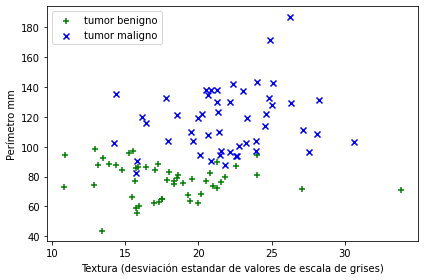

In [ ]:
plt.scatter(BC_df[:50, 0], BC_df[:50, 1], color='green', marker='+', label='tumor benigno')
plt.scatter(BC_df[50:, 0], BC_df[50:, 1], color='blue', marker='x', label='tumor maligno')
plt.xlabel('Textura (desviación estandar de valores de escala de grises)')
plt.ylabel('Perímetro mm')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Como se puede ver en la gráfica los datos petal length y cepal length son linealmente diferenciables entonces se pueden usar estos datos.

# Entrenamiento del perceptron

Se toma el 80% del dataset para entrenar el perceptron.



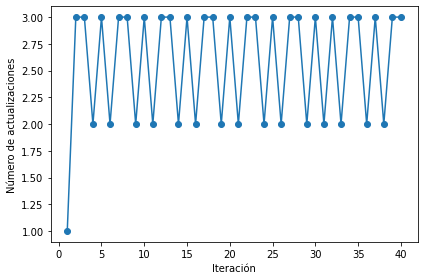

In [ ]:
#tomar el 80 % del dataset para el entrenamiento
X_training = np.concatenate((BC_df[:40],BC_df[50:90]),axis=0)
y_training = np.concatenate((y_BC[:40],y_BC[50:90]),axis=0)
#entrenar el perceptron
perceptron = Perceptron(2, 40)
perceptron.train(X_training, y_training)

plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='o')
plt.xlabel('Iteración')
plt.ylabel('Número de actualizaciones')

plt.tight_layout()
plt.show()

# Prueba del perceptron
Se toma el 20% restante del dataset para probar el perceptron

In [ ]:
#Tomar el 20% restante del dataset para probar el perceptron
X_test = np.concatenate((BC_df[41:50],BC_df[91:]),axis=0)
y_test = np.concatenate((y_BC[41:50],y_BC[91:]),axis=0)

#calcular los errores en la clasificacion 
error = 0
for i in range(0,len(X_test)):
    if perceptron.predict(X_test[i]) != y_test[i]:
        error += 1 
error = error / len(X_test) * 100
print("error = {}%".format(error))

error = 47.368421052631575%


El perceptron simple presentó un 53% de exactitud.



# Referencias

https://www.llipe.com/2017/04/19/programando-un-clasificador-perceptron-en-python/
https://machinelearningmastery.com/standard-machine-learning-datasets/

